## Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

## Test set Image Processing

In [2]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 29864 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

## Loading Model

In [68]:
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [69]:
cnn = tf.keras.models.load_model('trained_plant_disease_model7.h5')


In [70]:
!pip install opencv-python

## Visualising and Performing Prediction on Single image

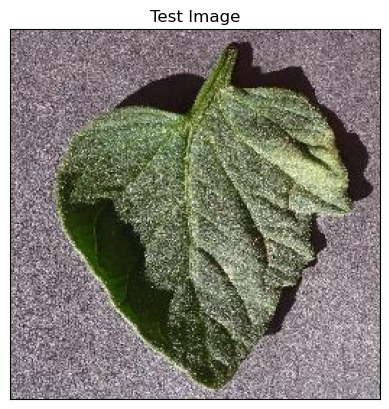

In [185]:
#Test Image Visualization
import cv2
image_path ="test/test/TomatoHealthy1.JPG"
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [186]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(224,224))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 29ms/step


In [187]:
print(predictions)

[[1.1261788e-18 1.9006901e-20 1.4539478e-16 1.7884221e-14 3.8401041e-18
  7.3136809e-14 1.5608284e-16 1.1292805e-18 1.2432565e-25 4.5747758e-22
  1.0878785e-21 3.0960050e-21 2.9898730e-21 2.7961912e-25 1.4431962e-21
  6.4173756e-22 6.8200610e-23 2.6961017e-21 1.0693840e-20 1.9031942e-19
  4.3812707e-19 1.0847989e-22 8.5758910e-18 9.2776353e-17 2.6285631e-17
  2.2736351e-09 1.3160389e-18 5.2982072e-18 2.1365022e-24 1.2195180e-23
  1.6728837e-16 5.8426964e-18 4.9382238e-19 3.3456732e-16 6.0888950e-12
  2.0389728e-19 1.0000000e+00 1.1175880e-13]]


In [188]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

36


In [189]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___healthy',
 'not_plant_leaf(please try agin)']

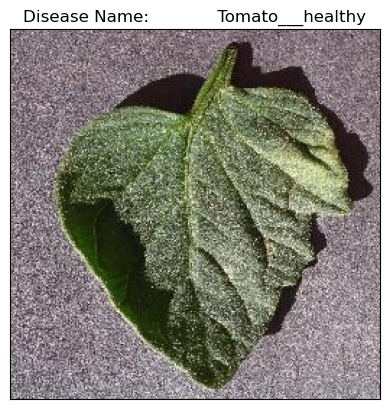

In [190]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name:             {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [43]:
# # Evaluate the TFLite model on the validation dataset
# for images, labels in validation_set:
#     for i in range(len(images)):
#         # Extract a single image and its corresponding label
#         image = images[i:i+1]  # Extract a single image with batch size 1
#         label = labels[i:i+1]  # Extract a single label with batch size 1
        
#         # Run inference
#         interpreter.set_tensor(input_details[0]['index'], image)
#         interpreter.invoke()
#         output_data = interpreter.get_tensor(output_details[0]['index'])
        
#         # Calculate accuracy
#         predicted_label = np.argmax(output_data)
#         true_label = np.argmax(label)
#         correct_predictions += (predicted_label == true_label)
#         total_samples += 1

# # Calculate accuracy
# accuracy = correct_predictions / total_samples
# print("Accuracy:", accuracy)


Accuracy: 0.9725130890052356


In [46]:
# import numpy as np
# import tensorflow as tf
# from keras.preprocessing.image import ImageDataGenerator

# # Load the model
# cnn = tf.keras.models.load_model('trained_plant_disease_model7.h5')

# # Convert the model to TFLite
# converter = tf.lite.TFLiteConverter.from_keras_model(cnn)
# tflite_model = converter.convert()

# # Save the TFLite model to disk
# with open('trained_plant_disease_model7.tflite', 'wb') as f:
#     f.write(tflite_model)

# # Load the TFLite model
# interpreter = tf.lite.Interpreter(model_path='trained_plant_disease_model7.tflite')
# interpreter.allocate_tensors()

# # Get input and output details
# input_details = interpreter.get_input_details()
# output_details = interpreter.get_output_details()

# # Load validation dataset
# validation_set = tf.keras.utils.image_dataset_from_directory(
#     'valid',
#     labels="inferred",
#     label_mode="categorical",
#     class_names=None,
#     color_mode="rgb",
#     batch_size=32,
#     image_size=(128, 128),
#     shuffle=False  # Keep the order for evaluation
# )

# # Initialize variables to calculate accuracy
# total_samples = 0
# correct_predictions = 0

# # Evaluate the TFLite model on the validation dataset
# for images, labels in validation_set:
#     # Run inference
#     interpreter.set_tensor(input_details[0]['index'], images)
#     interpreter.invoke()
#     output_data = interpreter.get_tensor(output_details[0]['index'])
    
#     # Calculate accuracy
#     predicted_labels = np.argmax(output_data, axis=1)
#     true_labels = np.argmax(labels, axis=1)
#     correct_predictions += np.sum(predicted_labels == true_labels)
#     total_samples += len(labels)

# # Calculate accuracy
# accuracy = correct_predictions / total_samples
# print("Accuracy:", accuracy)


In [ ]:
# import numpy as np
# import tensorflow as tf
# from PIL import Image

# # Load the TFLite model
# interpreter = tf.lite.Interpreter(model_path='trained_plant_disease_model7.tflite')
# interpreter.allocate_tensors()

# # Get input and output details
# input_details = interpreter.get_input_details()
# output_details = interpreter.get_output_details()

# # Load and preprocess the test image
# image_path = "C:/Users/A1/Downloads/a-large-leaf-on-a-potato-plant-showing-hairs.jpg"
# image = Image.open(image_path).resize((input_details[0]['shape'][1], input_details[0]['shape'][2]))
# input_data = np.expand_dims(np.array(image, dtype=np.float32) / 255.0, axis=0)

# # Set the input tensor
# interpreter.set_tensor(input_details[0]['index'], input_data)

# # Run inference
# interpreter.invoke()

# # Get the output tensor
# output_data = interpreter.get_tensor(output_details[0]['index'])

# # Postprocess the output
# result_index = np.argmax(output_data)
# class_name = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 
#               'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 
#               'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 
#               'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 
#               'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 
#               'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 
#               'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 
#               'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 
#               'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 
#               'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 
#               'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 
#               'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 
#               'Tomato___healthy']

# # Display the result
# print("Predicted Class:", class_name[result_index])
